# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | at taj
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | nouadhibou
Processing Record 7 of Set 1 | usinsk
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | gizo
Processing Record 10 of Set 1 | talitsa
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | new castle
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | fuling
Processing Record 15 of Set 1 | at-bashi
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | puerto aysen
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 

Processing Record 39 of Set 4 | kaiapoi
Processing Record 40 of Set 4 | ciudad lazaro cardenas
Processing Record 41 of Set 4 | gadzhiyevo
Processing Record 42 of Set 4 | smach mean chey
City not found. Skipping...
Processing Record 43 of Set 4 | talnakh
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | uthal
Processing Record 46 of Set 4 | awjilah
Processing Record 47 of Set 4 | port douglas
Processing Record 48 of Set 4 | inhambane
Processing Record 49 of Set 4 | cambria
Processing Record 0 of Set 5 | dunhua
Processing Record 1 of Set 5 | ketchikan
Processing Record 2 of Set 5 | yuzhno-kurilsk
Processing Record 3 of Set 5 | rio grande
Processing Record 4 of Set 5 | howard springs
Processing Record 5 of Set 5 | east london
Processing Record 6 of Set 5 | la palma
Processing Record 7 of Set 5 | afonso bezerra
Processing Record 8 of Set 5 | betio village
Processing Record 9 of Set 5 | dunedin
Processing Record 10 of Set 5 | geraldton
Processing Record 11 of Set 

Processing Record 28 of Set 8 | diapaga
Processing Record 29 of Set 8 | sa kaeo
Processing Record 30 of Set 8 | yarovoye
Processing Record 31 of Set 8 | baza
Processing Record 32 of Set 8 | santiago de cao
Processing Record 33 of Set 8 | urangan
Processing Record 34 of Set 8 | urambo
Processing Record 35 of Set 8 | ryotsu-minato
Processing Record 36 of Set 8 | monteagudo
Processing Record 37 of Set 8 | page
Processing Record 38 of Set 8 | shalqar
Processing Record 39 of Set 8 | recani
Processing Record 40 of Set 8 | urengoy
Processing Record 41 of Set 8 | santo antonio
Processing Record 42 of Set 8 | kashmar
Processing Record 43 of Set 8 | mozarlandia
Processing Record 44 of Set 8 | hadibu
Processing Record 45 of Set 8 | bengkulu
Processing Record 46 of Set 8 | kolonia
Processing Record 47 of Set 8 | scottburgh
Processing Record 48 of Set 8 | hami
Processing Record 49 of Set 8 | kulhudhuffushi
Processing Record 0 of Set 9 | newport
Processing Record 1 of Set 9 | yanjiang
Processing Rec

Processing Record 20 of Set 12 | san julian
Processing Record 21 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 22 of Set 12 | pato branco
Processing Record 23 of Set 12 | araioses
Processing Record 24 of Set 12 | gamay
Processing Record 25 of Set 12 | sant'antioco
Processing Record 26 of Set 12 | rock springs
Processing Record 27 of Set 12 | najran
Processing Record 28 of Set 12 | aitape
Processing Record 29 of Set 12 | ugoofaaru
Processing Record 30 of Set 12 | bandar abbas
Processing Record 31 of Set 12 | chernyshevskiy
Processing Record 32 of Set 12 | jincheng
Processing Record 33 of Set 12 | kuje
Processing Record 34 of Set 12 | noumea
Processing Record 35 of Set 12 | ghat
Processing Record 36 of Set 12 | ayr
Processing Record 37 of Set 12 | aldan
Processing Record 38 of Set 12 | edmundston
Processing Record 39 of Set 12 | rongelap
Processing Record 40 of Set 12 | melfort
Processing Record 41 of Set 12 | maksatikha
-----------------------------
Data Retrieval

In [14]:
# Convert the cities weather data into a Pandas DataFrame
# city_data is a list of dictionaries where the keys are column names
# to create a dataframe from such an object we use from_dict method from pandas library
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,279.51,88,75,2.24,RU,1697574926
1,at taj,24.2049,23.2857,294.25,30,0,4.73,LY,1697574926
2,hilo,19.7297,-155.0900,301.62,73,75,4.12,US,1697574850
3,waitangi,-43.9535,-176.5597,284.72,76,8,1.79,NZ,1697574927
4,vila franca do campo,37.7167,-25.4333,294.20,99,80,5.26,PT,1697574927


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,279.51,88,75,2.24,RU,1697574926
1,at taj,24.2049,23.2857,294.25,30,0,4.73,LY,1697574926
2,hilo,19.7297,-155.0900,301.62,73,75,4.12,US,1697574850
3,waitangi,-43.9535,-176.5597,284.72,76,8,1.79,NZ,1697574927
4,vila franca do campo,37.7167,-25.4333,294.20,99,80,5.26,PT,1697574927


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

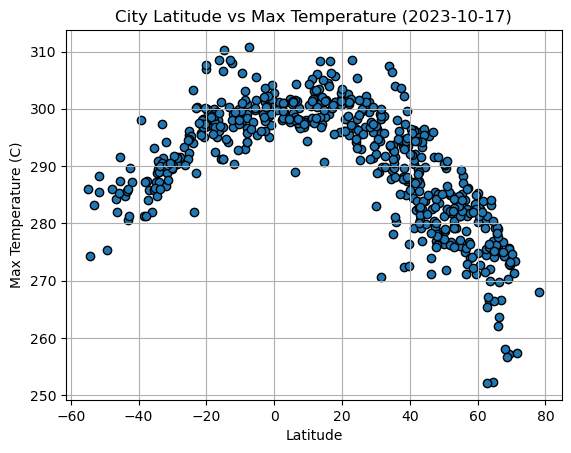

In [3]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
# gridlines
plt.grid()

# axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# chart title
plt.title('City Latitude vs Max Temperature (2023-10-17)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

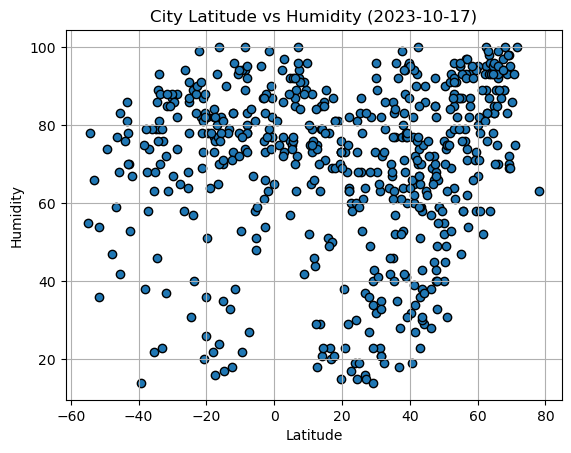

In [4]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
# gridlines
plt.grid()

# axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# chart title
plt.title('City Latitude vs Humidity (2023-10-17)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

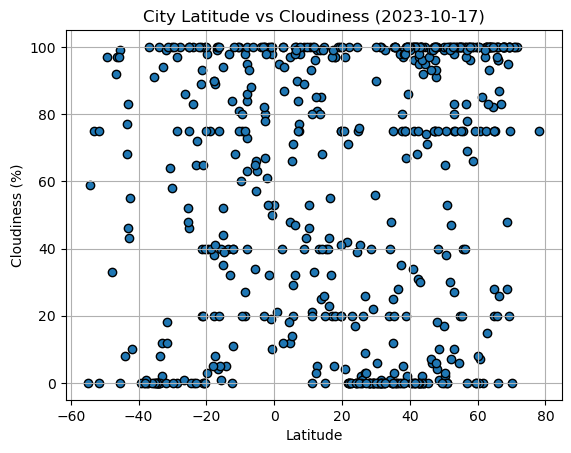

In [5]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
# gridlines
plt.grid()

# axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# chart title
plt.title('City Latitude vs Cloudiness (2023-10-17)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

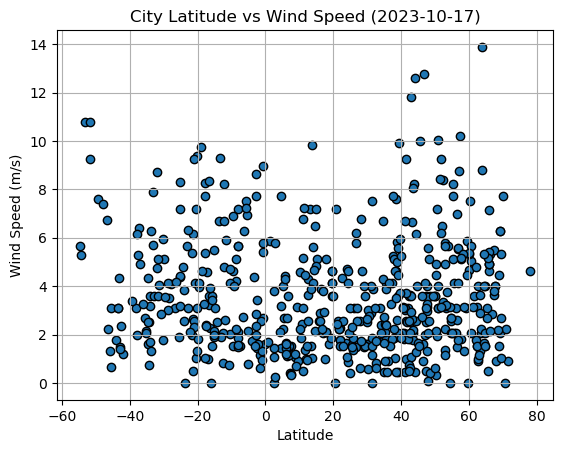

In [6]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
# gridlines
plt.grid()

# axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# chart title
plt.title('City Latitude vs Wind Speed (2023-10-17)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots


# this function takes in arguments of the xcol and ycol as the columns of the dataframe to be used for regression
# as well as xlab and ylab, the labels of these columns for the plot
# it will compute the regression, print the r value and the regression equation
# then plot a scatterplot of the data with the regression line added
def linregplot(xcol, ycol, xlab, ylab):
    # call linregress from scipy stats using the x and y passed in as arguments
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xcol, ycol)
    
    # print the r value
    print(f'The r-value is {rvalue:.3f}')
    
    # define line equation string, using slope and intercept from linear regression
    line_eq_label = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # print the regression equation
    print(f'The regression line equation is: {line_eq_label}')
    
    # make the scatterplot
    plt.scatter(x=xcol, y=ycol)
    
    # add x and y labels to the plot
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    
    # add title to the plot using x and y labels
    plt.title(f'{xlab} vs {ylab}')
    
    # add the line from the linear regression to the plot
    plt.plot(xcol, slope*xcol + intercept, color='red')
    
    # show the plot
    plt.show()


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,279.51,88,75,2.24,RU,1697574926
1,at taj,24.2049,23.2857,294.25,30,0,4.73,LY,1697574926
2,hilo,19.7297,-155.0900,301.62,73,75,4.12,US,1697574850
4,vila franca do campo,37.7167,-25.4333,294.20,99,80,5.26,PT,1697574927
5,nouadhibou,20.9310,-17.0347,298.14,73,4,7.20,MR,1697574927


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,284.72,76,8,1.79,NZ,1697574927
7,edinburgh of the seven seas,-37.0676,-12.3116,285.78,74,100,4.91,SH,1697574928
8,gizo,-8.1030,156.8419,300.83,80,95,2.11,SB,1697574929
12,punta arenas,-53.1500,-70.9167,283.21,66,75,10.80,CL,1697574730
16,puerto aysen,-45.4000,-72.7000,287.46,83,99,0.65,CL,1697574932


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.840
The regression line equation is: y = -0.49x + 307.50


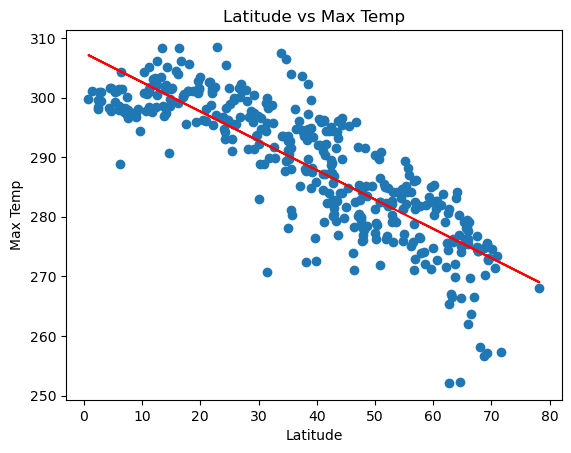

In [39]:
# Linear regression on Northern Hemisphere
# call the regression plot method that we made earlier
linregplot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

The r-value is 0.777
The regression line equation is: y = 0.38x + 302.83


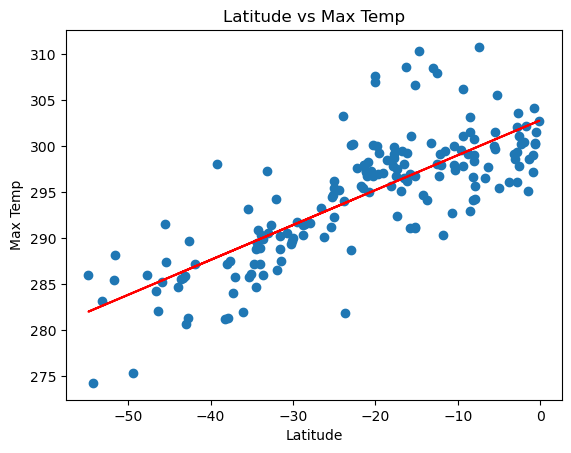

In [40]:
# Linear regression on Southern Hemisphere
linregplot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** Latitude and Temperature clearly have a strong linear relationship, visible in both scatterplots. This can be seen in their correlation coefficients, with the Northern Hemisphere having a correlation coefficient of -.84 (a strong negative correlation), and the Southern Hemisphere having a correlation coefficient of 0.78 (a strong positive correlation). The regression lines for both also indicate that the Latitude of the city is a fairly good predictor for the Max Temperature of that city, with slopes of -.49 and .38, respectively. Visually, the regression lines fit very well to the scatterplot, and the spread of the data seems to match the regression line very well in terms of shape.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.227
The regression line equation is: y = 0.26x + 59.19


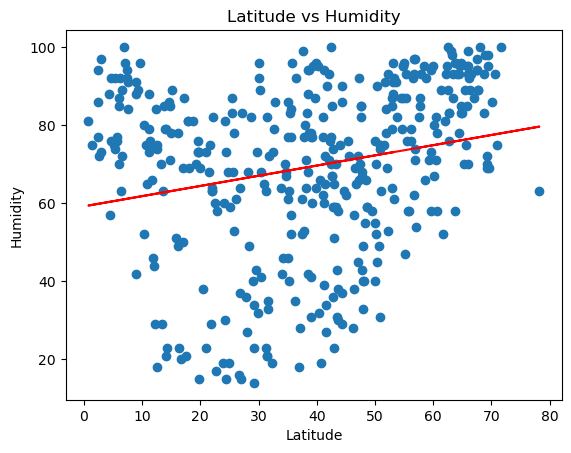

In [41]:
# Northern Hemisphere
linregplot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is 0.136
The regression line equation is: y = 0.20x + 75.23


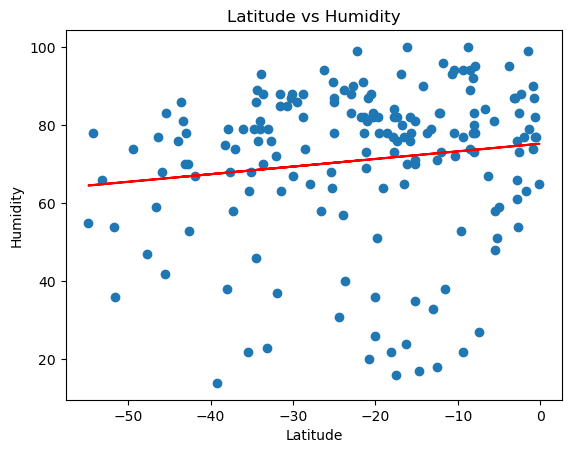

In [42]:
# Southern Hemisphere
linregplot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** These plots indicate a very weak correlation between Latitude and Humidity, for both the Northern and Southern Hemispheres. With correlation coefficients of .227 and .136, both hemispheres show only very weak positive correlation. We can also see on the scatterplots that the shape of the data does not have any particularly strong linear relationship, mostly being a wide spread on both dimensions with no trend. The regression lines both have very small slopes, with .26 and .2 respectively, indicating that the Latitude of a city is not very good at predicting change in humidity of that city, and the regression lines on the plot don't seem to match up with the spread or trend of the data in any meaningful way.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.201
The regression line equation is: y = 0.44x + 40.71


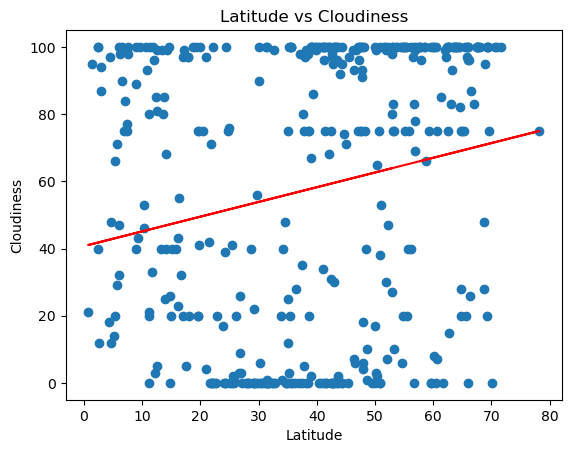

In [43]:
# Northern Hemisphere
linregplot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is 0.252
The regression line equation is: y = 0.69x + 68.64


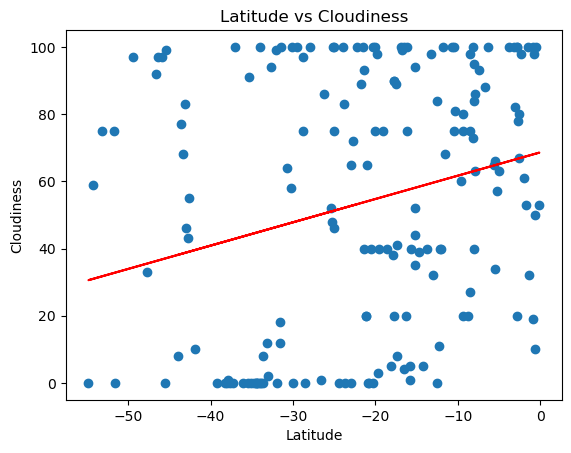

In [44]:
# Southern Hemisphere
linregplot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** These plots for Latitude vs Cloudiness show stronger regression lines than the previous set  (those for latitude vs humidity), but ultimately still don't speak to a strong linear relationship between these variables. The correlation coefficients for the Northern and Southern hemispheres are only .201 and .252, indicating weak positive correlation, and the slope of the regression lines are only .44 and .69. Ultimately the least compelling part is the regression line displayed over the scatterplot, because while the line appears to show a fair positive relationship, it does not match the spread of the data nearly as well as that of the plots for latitude vs temperature. Here, the regression line seems to be affected quite heavily by the large number of datapoints which exist at the extremes of Cloudiness scale (either 0% cloudiness or 100% cloudiness) but those extreme values don't give the data any kind of linear shape, visually (in fact, the Northern hemisphere plot almost appears quadratic when the extreme values are considered, with some group at 100% cloudiness up to latitude 20, then at 0% cloudiness from latitudes 20 to 45, and back up to 100% cloudiness for the slightly overlapping latitudes of 35 to 70. Not so much the shape of a parabola as three notable points of a parabola, but the trend of many points high then low then high again as you progress through the x axis implies a nonlinear relationship at the very least). This result does make sense to me, because the cloudiness value is a percentage representing the cloudiness for the single day on which this data was pulled, and if latitude were capable of being a useful predictor for cloudiness I would expect it to be in a more generalized sense (predicting the amount of cloudiness over some set of days or weeks, for example) whereas predicting cloudiness for a single day is much more specific and therefore much more difficult.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.172
The regression line equation is: y = 0.02x + 2.53


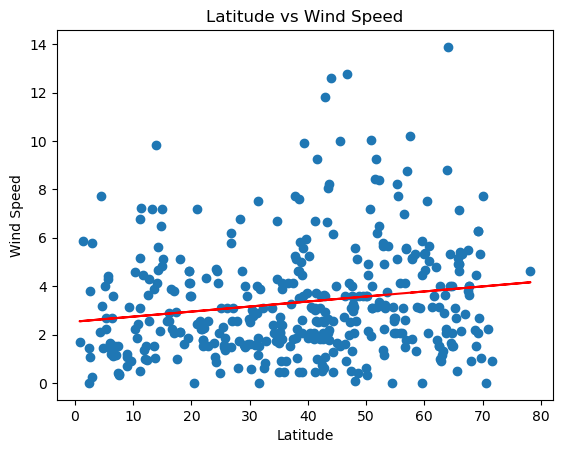

In [45]:
# Northern Hemisphere
linregplot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is -0.121
The regression line equation is: y = -0.02x + 3.46


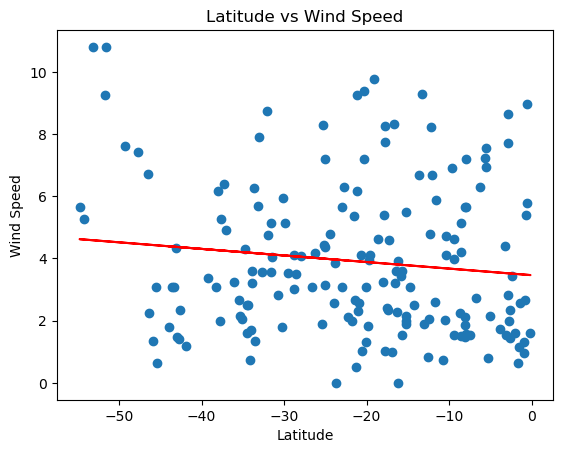

In [46]:
# Southern Hemisphere
linregplot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** The relationship between wind speed and latitude is again quite weak. The correlation coefficients are only .172 and -.121, indicating very weak positive and negative correlation, respectively. Additionally, the slopes from the two regresison lines are .02 and -.02, indicating that latitude is very, very weak as a predictor for wind speed. The scatterplots show no linear trends to speak of, and the regression lines don't match up with the data very well at all.